<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

In [75]:
# Load the data
house = pd.read_csv('./housing.csv')

In [76]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [77]:
house.shape

(1460, 81)

In [81]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [79]:
#searching for columns with null value
house_null = (house.isnull().sum()) / house.shape[0]
mask = house_null !=0
house_null = house_null[mask].sort_values(ascending = False)
house_null

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

From the data description most of the features with null values are indicate as not available instead of missing value. This can be confirmed from pool area which contained 0 indicating pool is unavailable

In [93]:
#dropped Id which cannot be use a predictor, dropped columns with null values more than 90%, dropped PoolArea too due to pool availability is less than 1%
house = house.drop(columns=['Id','PoolQC','MiscFeature','Alley','PoolArea'])

In [95]:
house_null = (house.isnull().sum()) / house.shape[0]
mask = house_null !=0
house_null = house_null[mask].sort_values(ascending = False)

In [96]:
for col in house_null.index: #check unique value for columns with null
    print(col, 'unique number:\n', house[col].unique())

Fence unique number:
 [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
FireplaceQu unique number:
 [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
LotFrontage unique number:
 [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
GarageCond unique number:
 ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
GarageQual unique number:
 ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
GarageFinish unique number:
 ['RFn' 'Unf' 'Fin' nan]
GarageYrBlt unique number:
 [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 19

In [97]:
house['Fence'] = house['Fence'].fillna(value='NoFence')
house['FireplaceQu'] = house['FireplaceQu'].fillna(value='NoFireplace')
house[['GarageType','GarageFinish','GarageQual','GarageCond']] = house[['GarageType','GarageFinish','GarageQual','GarageCond']].fillna(value='NoGarage')
house[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']] = house[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']].fillna(value='NoBsmt')
house['MasVnrType'] = house['MasVnrType'].fillna(value='NoMasVnr')

In [98]:
house['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [99]:
#replaced the single null value under 'Electrical' column with most frequent value
house['Electrical'] = house['Electrical'].fillna(value='SBrkr')

In [100]:
#for Garage year built, replaced with year of house built
house.loc[:,'GarageYrBlt'] = house['GarageYrBlt'].fillna((house['YearBuilt']).astype(int))
#for Masonry veneer area, null value, replaced 0 since MasVnrType is not available
house.loc[house['MasVnrArea'].isnull(), 'MasVnrArea'] = 0

In [101]:
#for Lot Frontage null value, replaced with columns' median value, using median to avoid outliers
from sklearn.preprocessing import Imputer

imp_lot = Imputer(missing_values = 'NaN', strategy = 'median')
house[['LotFrontage']] = imp_lot.fit_transform(house[['LotFrontage']])

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [102]:
house.isnull().values.any() #all null values already fixed

False

In [103]:
#clean columns with only one unique number
unique = house.nunique()
unique = unique[unique.values == 1]
house.drop(labels = list(unique.index), axis =1, inplace=True) 
house.shape

(1460, 76)

After data cleaning, next is to extract housing data under residential only

In [104]:
house['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [105]:
res_data = house[house['MSZoning'].str.startswith('R')]

In [106]:
res_data.shape

(1385, 76)

In [107]:
res_data['SalePrice'].describe()

count      1385.000000
mean     180136.283032
std       79906.363281
min       37900.000000
25%      129000.000000
50%      160000.000000
75%      212900.000000
max      755000.000000
Name: SalePrice, dtype: float64

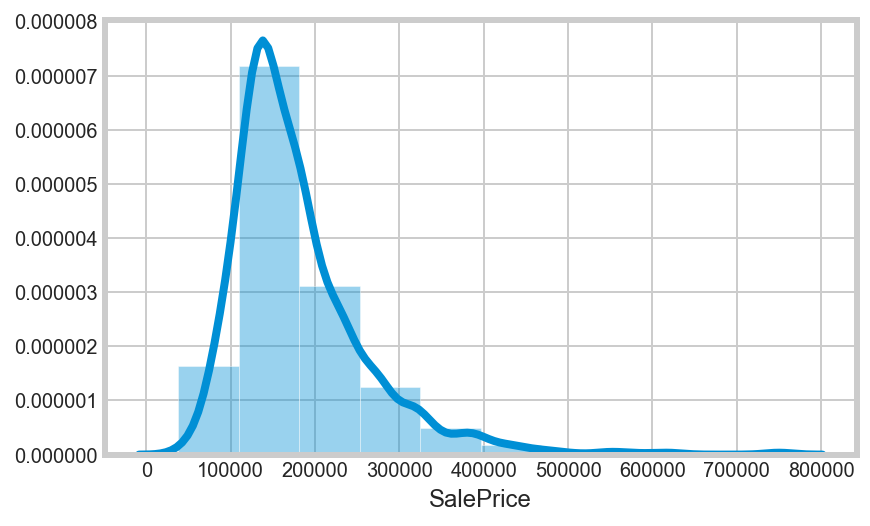

In [108]:
sns.distplot(res_data['SalePrice'],bins=10)

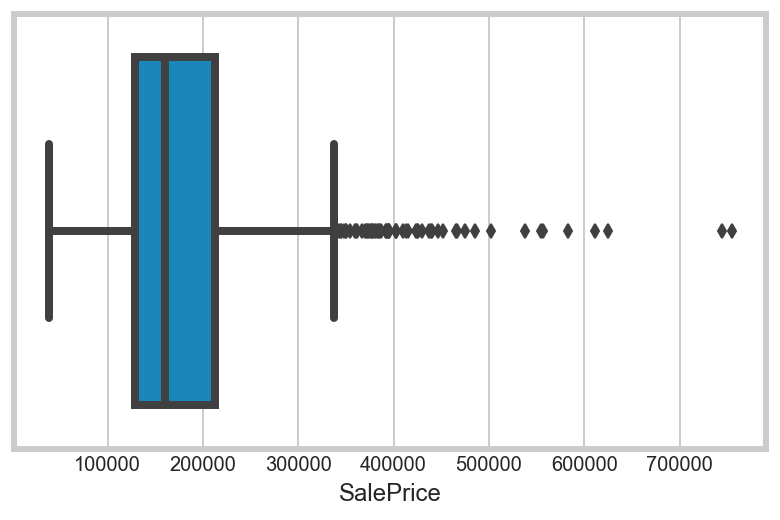

In [109]:
sns.boxplot(res_data['SalePrice'])

Since "SalePrice" is target for this modeling, descriptive statistic summary was checked
Most of the sale price fall between $130k to $213k, with median price at $160k, outliers were observed. 

In [110]:
mask = (res_data['SalePrice']>700000) #removed outliers which is more than $700k
res_data = res_data[~mask]

In [111]:
#correlation check on numerical features over SalePrice
corr = res_data.corr(method='pearson').drop(['SalePrice']).sort_values('SalePrice', ascending=False)['SalePrice']
corr

OverallQual      0.795820
GrLivArea        0.692970
GarageCars       0.649515
GarageArea       0.637043
TotalBsmtSF      0.612963
1stFlrSF         0.611035
FullBath         0.553349
TotRmsAbvGrd     0.536054
YearBuilt        0.528934
GarageYrBlt      0.517165
YearRemodAdd     0.512842
MasVnrArea       0.504754
Fireplaces       0.468941
BsmtFinSF1       0.381454
OpenPorchSF      0.333789
LotFrontage      0.324851
WoodDeckSF       0.323725
2ndFlrSF         0.294170
HalfBath         0.280920
LotArea          0.273334
BsmtFullBath     0.236925
BsmtUnfSF        0.219206
BedroomAbvGr     0.155231
ScreenPorch      0.123594
MoSold           0.058087
3SsnPorch        0.049802
BsmtFinSF2      -0.005878
LowQualFinSF    -0.014630
MiscVal         -0.019462
YrSold          -0.027036
BsmtHalfBath    -0.033417
OverallCond     -0.083386
MSSubClass      -0.090153
EnclosedPorch   -0.116524
KitchenAbvGr    -0.138769
Name: SalePrice, dtype: float64

Top 5 features with highest correlation were chosen to plot for better visualization 
OverallQual      0.790986
GrLivArea        0.708499
GarageCars       0.640954
GarageArea       0.629048
TotalBsmtSF      0.617536

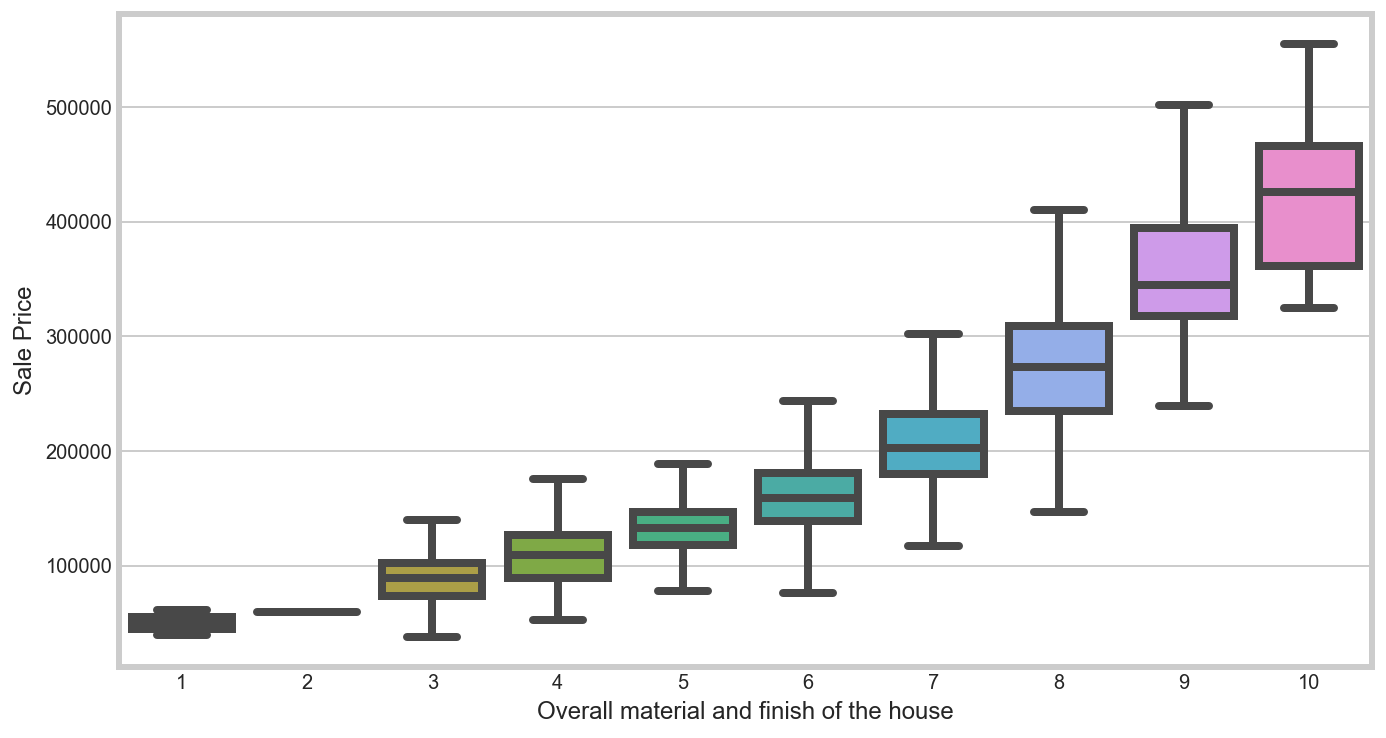

In [112]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x=res_data['OverallQual'], y=res_data['SalePrice'], data=res_data, showfliers = False)
plt.ylabel('Sale Price')
plt.xlabel('Overall material and finish of the house')
plt.show()

Overall material and finish of the house has strong positive correlation toward property sale price

Text(0.5, 0, 'Above grade (ground) living area square feet')

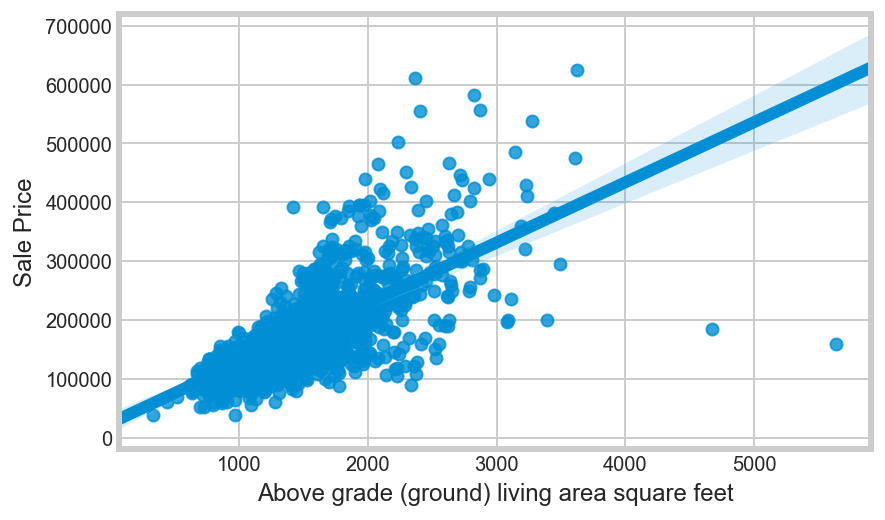

In [113]:
sns.regplot(x="GrLivArea", y="SalePrice", data=res_data, fit_reg=True);
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')

living area in square feet shows positive correlation but with few outliers observed 

In [114]:
mask = (res_data['GrLivArea']>4000) #removed outliers which is more than 4000sqft
res_data = res_data[~mask]

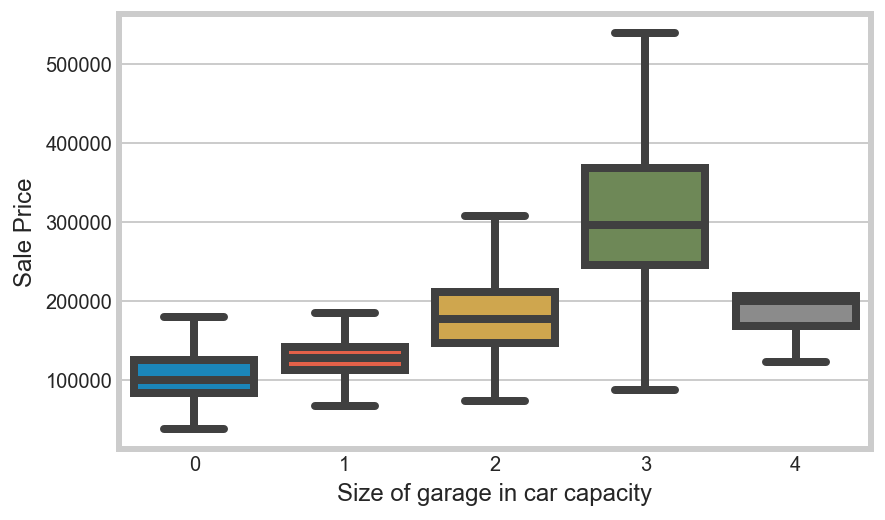

In [115]:
ax = sns.boxplot(x=res_data['GarageCars'], y=res_data['SalePrice'], data=res_data, showfliers = False)
plt.ylabel('Sale Price')
plt.xlabel('Size of garage in car capacity')
plt.show()

In [116]:
res_data['GarageCars'].value_counts()

2    763
1    365
3    169
0     79
4      5
Name: GarageCars, dtype: int64

For size of garage, it is assumed that bigger garage will yield higher sale price, but due to insufficient data, garage with 4 cars capacity seems to have lower median sale price compare to 3 cars capacity

Text(0.5, 0, 'Size of garage in square feet')

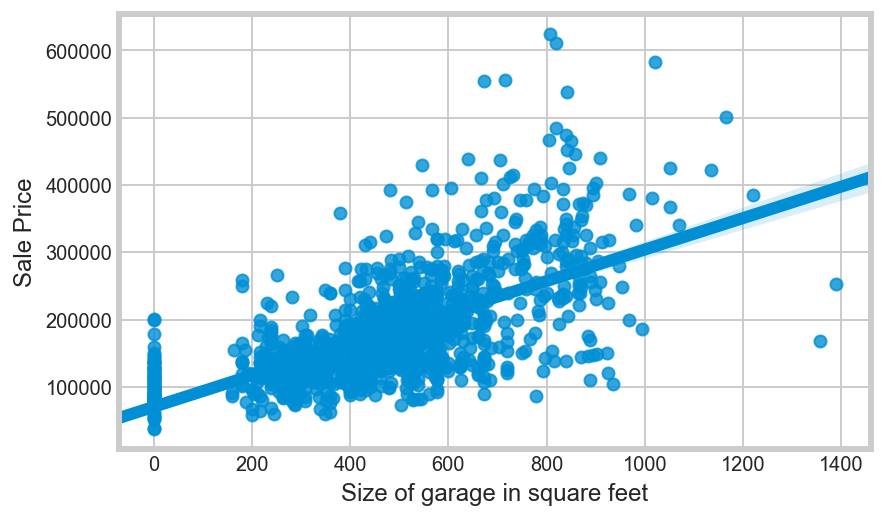

In [117]:
sns.regplot(x="GarageArea", y="SalePrice", data=res_data, fit_reg=True)

plt.ylabel('Sale Price')
plt.xlabel('Size of garage in square feet')

Garage with 0 square feet indicates no garage available for the property, few outliers observed at 800 square feet which have sale price beyond $600k 

Text(0.5, 0, 'Total square feet of basement area')

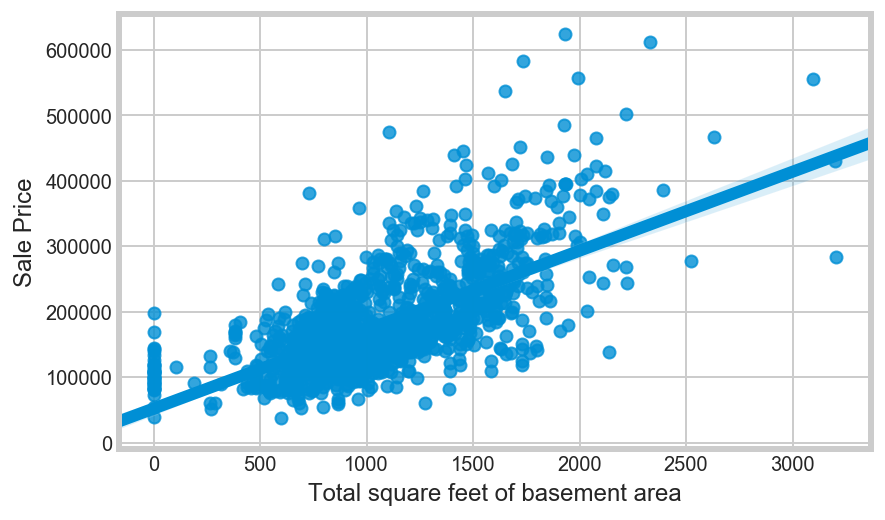

In [118]:
sns.regplot(x="TotalBsmtSF", y="SalePrice", data=res_data, fit_reg=True)

plt.ylabel('Sale Price')
plt.xlabel('Total square feet of basement area')

basement area with 0 square feet indicates no basement available for the property, one outlier observed at basement area above 6000 square feet

In [119]:
mask = (res_data['TotalBsmtSF']>6000) #removed outliers which is more than 6000sqft
res_data = res_data[~mask]

After studying on numrical features, now move to categorical features. 

In [120]:
#From the data, OverallQual, OverallCond and MSSubClass should be under categorical variables
res_data['MSSubClass'] = res_data['MSSubClass'].astype('object')
res_data['OverallQual'] = res_data['OverallQual'].astype('object')
res_data['OverallCond'] = res_data['OverallCond'].astype('object')

In [121]:
res_data.groupby('Neighborhood', as_index=True)['SalePrice'].median().sort_values(ascending = False)

Neighborhood
NridgHt    315000
NoRidge    290000
StoneBr    278000
Somerst    248328
Timber     228475
Veenker    218000
Crawfor    200624
ClearCr    200250
CollgCr    197200
Blmngtn    191000
NWAmes     182900
Gilbert    181000
SawyerW    179900
Mitchel    153500
NPkVill    146000
NAmes      140000
SWISU      139500
Blueste    137500
Sawyer     135000
BrkSide    124300
Edwards    119500
OldTown    118250
IDOTRR     112500
BrDale     106000
MeadowV     88000
Name: SalePrice, dtype: int64

Property location is also a key feature to determine the property sale price

In [122]:
cat_features = res_data.select_dtypes(exclude=[np.number]) #extract all non-numerical features

In [123]:
cat_features.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'], dtype='object')

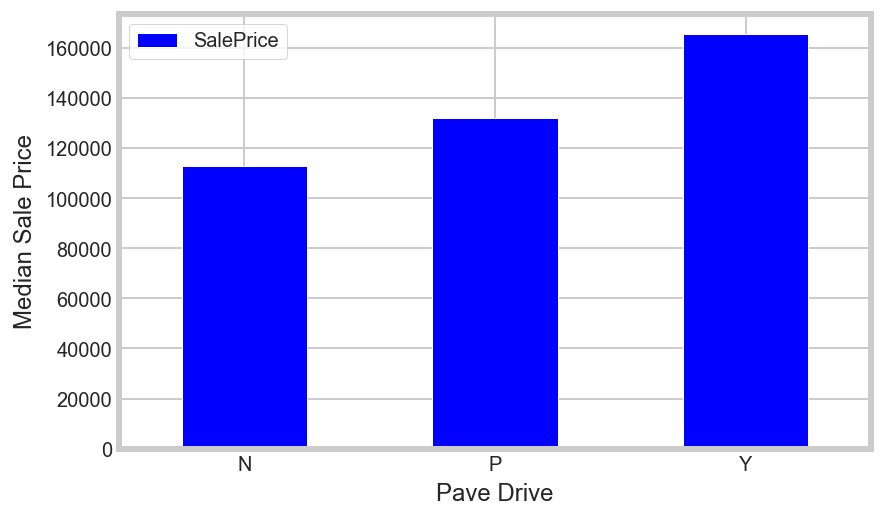

In [124]:
condition_pivot = res_data.pivot_table(index='PavedDrive', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Pave Drive')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

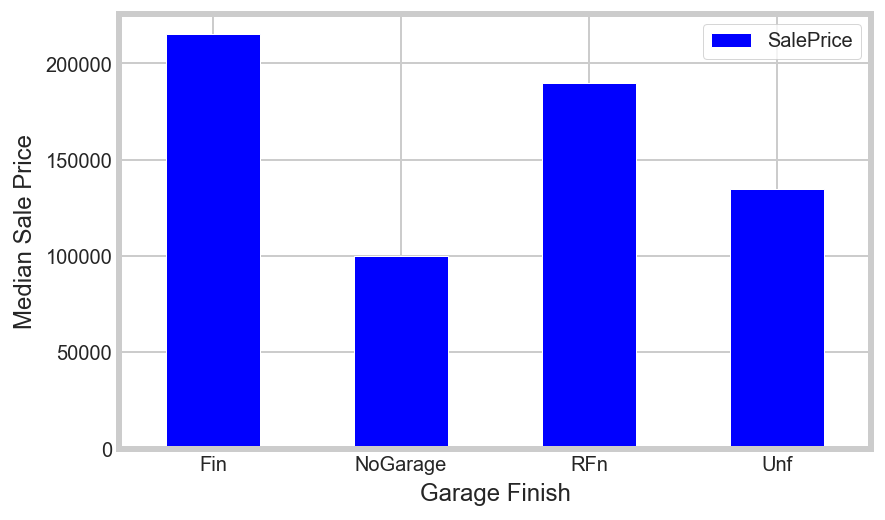

In [125]:
condition_pivot = res_data.pivot_table(index='GarageFinish', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Garage Finish')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

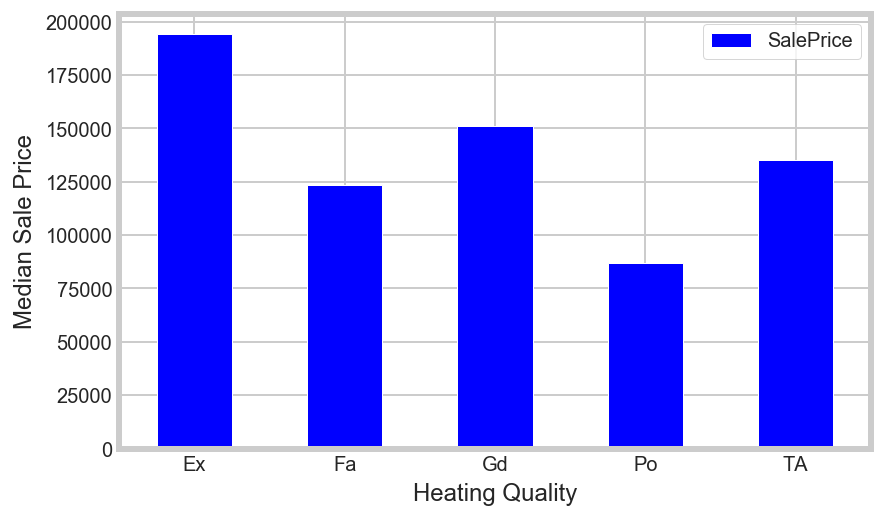

In [126]:
condition_pivot = res_data.pivot_table(index='HeatingQC', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Heating Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

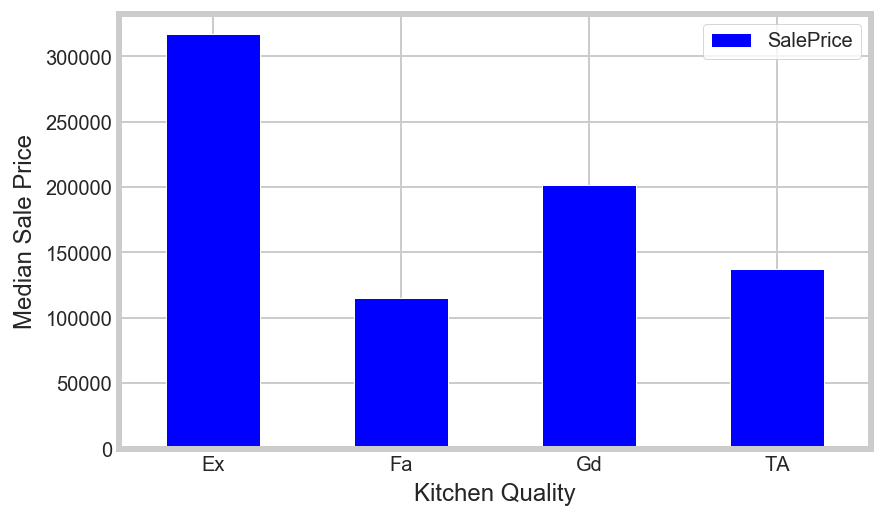

In [127]:
condition_pivot = res_data.pivot_table(index='KitchenQual', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Kitchen Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

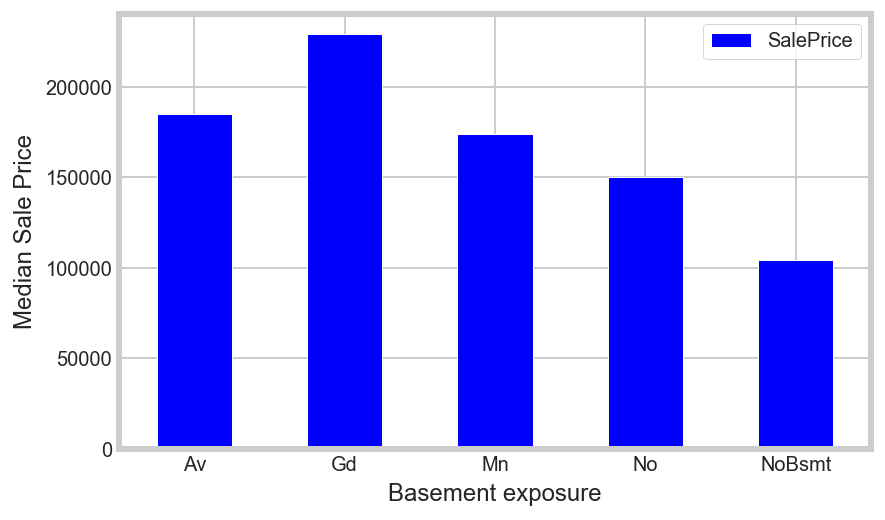

In [128]:
condition_pivot = res_data.pivot_table(index='BsmtExposure', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Basement exposure')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

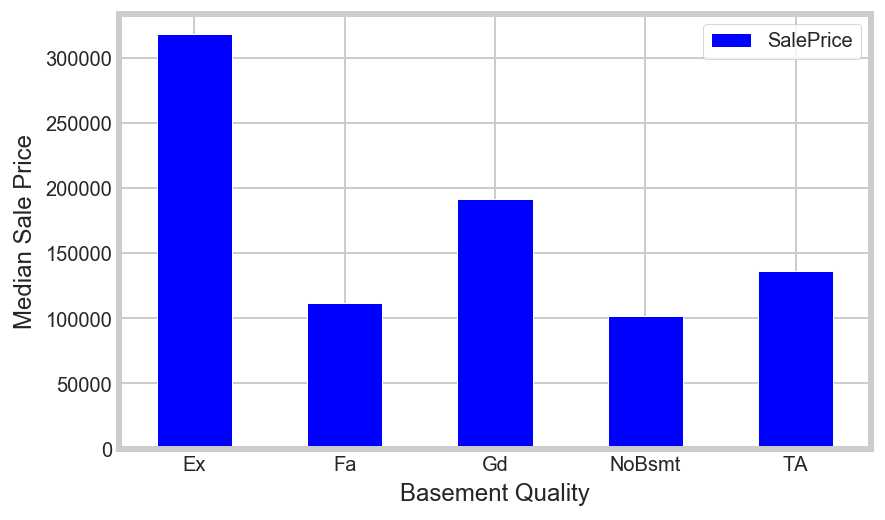

In [129]:
condition_pivot = res_data.pivot_table(index='BsmtQual', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Basement Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

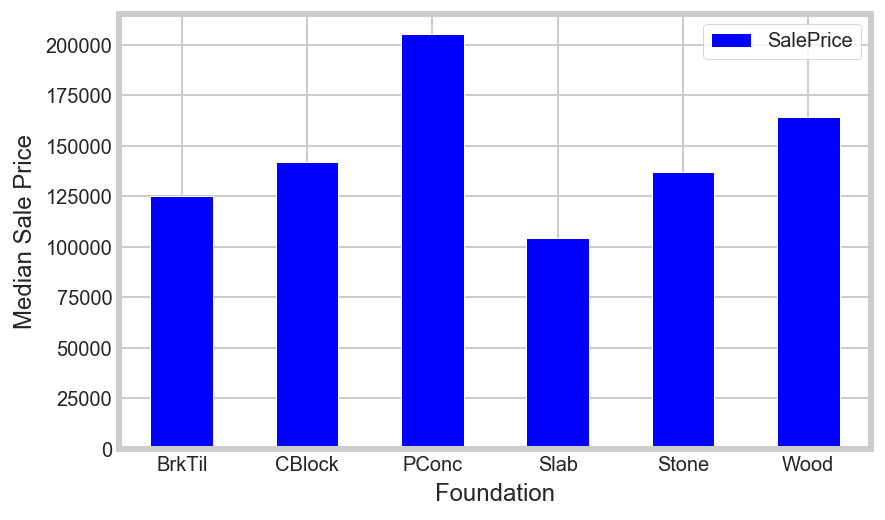

In [130]:
condition_pivot = res_data.pivot_table(index='Foundation', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Foundation')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

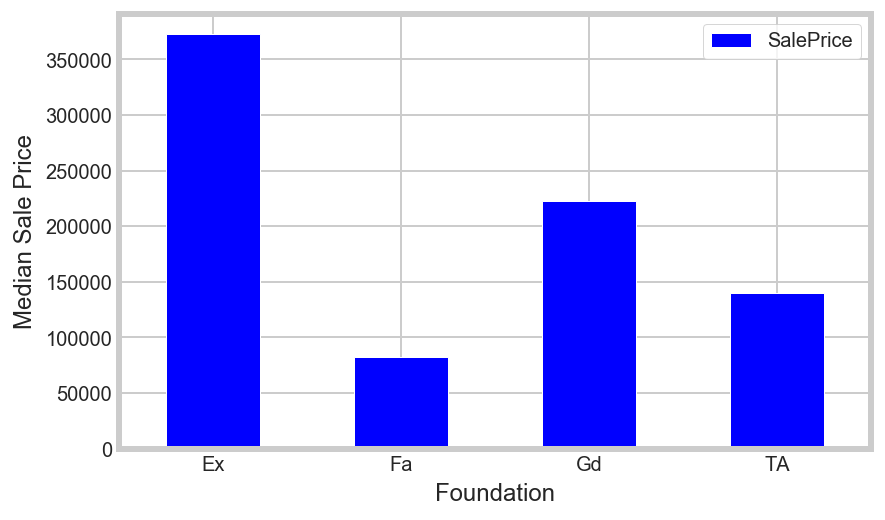

In [131]:
condition_pivot = res_data.pivot_table(index='ExterQual', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Foundation')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

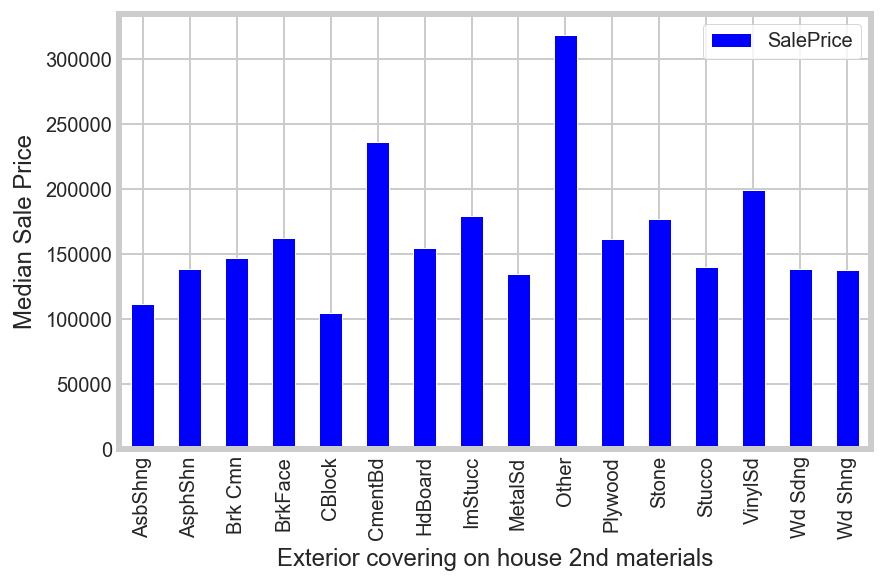

In [132]:
condition_pivot = res_data.pivot_table(index='Exterior2nd', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Exterior covering on house 2nd materials')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=90)
plt.show()

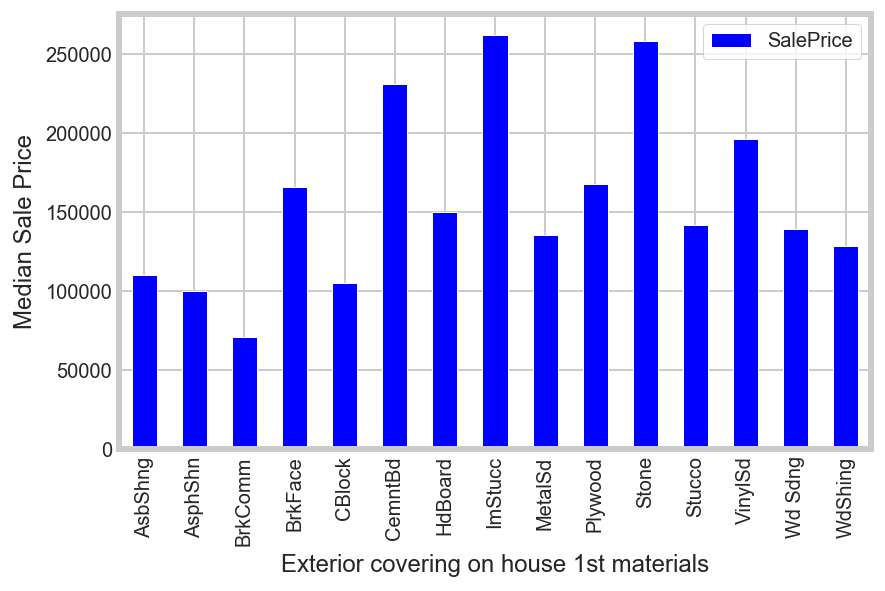

In [133]:
condition_pivot = res_data.pivot_table(index='Exterior1st', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Exterior covering on house 1st materials')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=90)
plt.show()

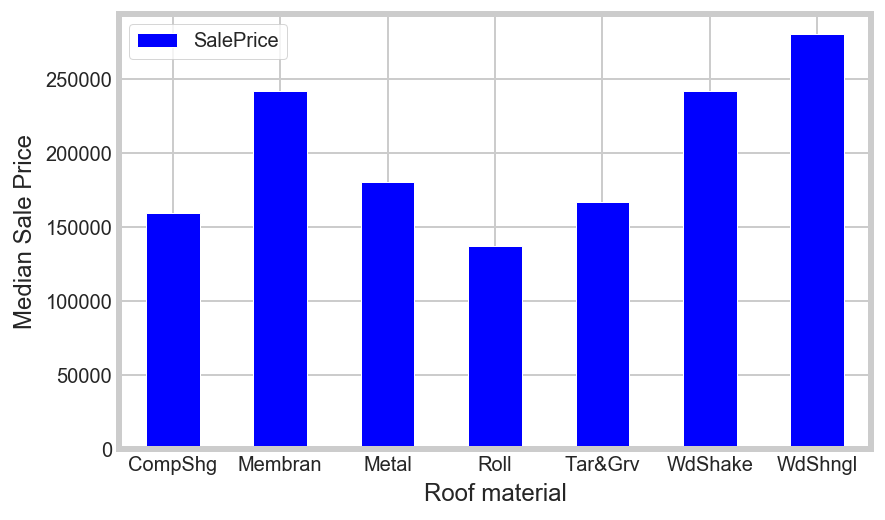

In [134]:
condition_pivot = res_data.pivot_table(index='RoofMatl', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Roof material')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

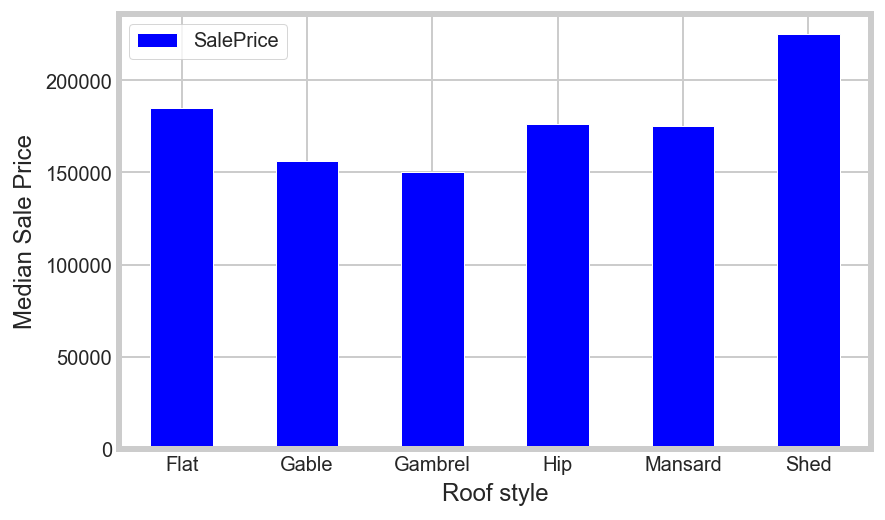

In [135]:
condition_pivot = res_data.pivot_table(index='RoofStyle', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Roof style')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

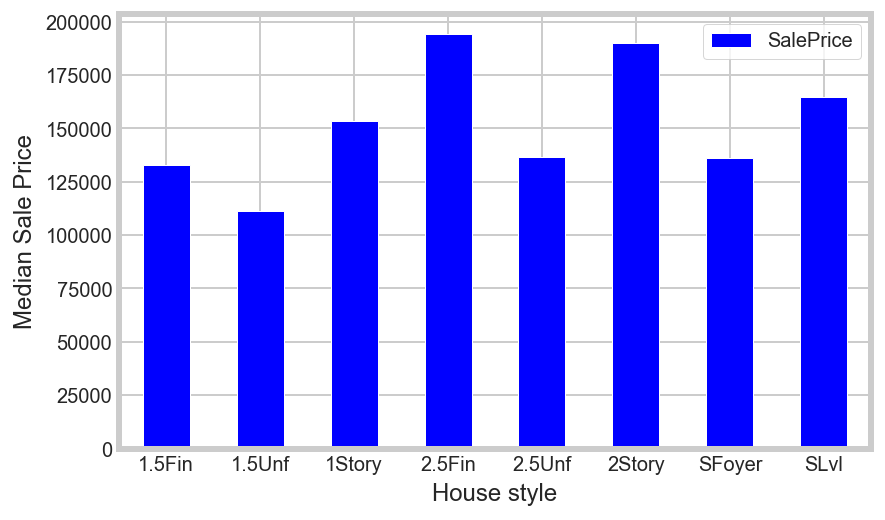

In [136]:
condition_pivot = res_data.pivot_table(index='HouseStyle', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('House style')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

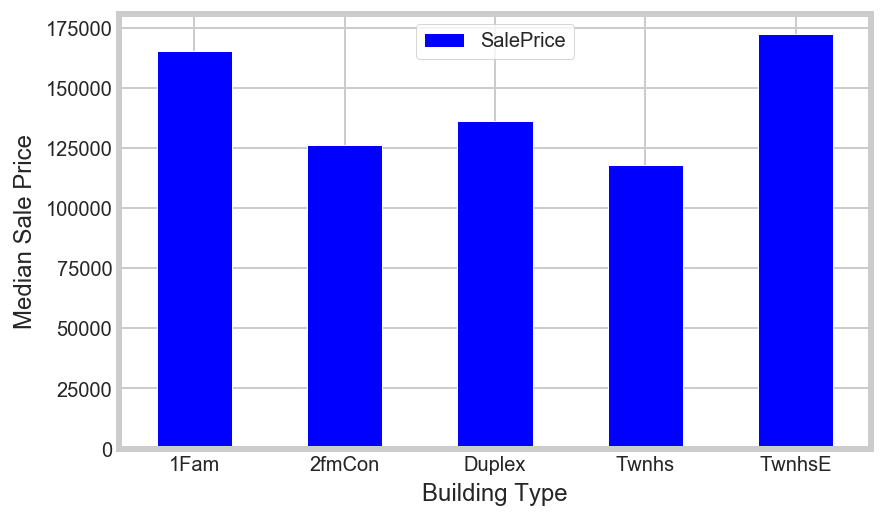

In [137]:
condition_pivot = res_data.pivot_table(index='BldgType', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Building Type')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [138]:
res_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NoFireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,NoFence,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,NoFence,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,NoFence,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,NoFence,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,NoFence,0,12,2008,WD,Normal,250000


In [139]:
fix_cat_features = ['PavedDrive','GarageFinish','HeatingQC','KitchenQual','BsmtExposure','BsmtQual','Foundation','ExterQual','Exterior1st','Exterior2nd','RoofMatl','RoofStyle','BldgType','HouseStyle','Neighborhood','OverallQual']
fix_num_features = ['GrLivArea','GarageArea','TotalBsmtSF','YrSold','SalePrice']

In [140]:
data_dummies = pd.get_dummies(res_data[fix_cat_features], drop_first=True)
data_dummies.shape

(1381, 112)

In [141]:
num_data = res_data[fix_num_features]

In [142]:
house_df = pd.concat([num_data, data_dummies], axis=1)

In [143]:
house_df.shape

(1381, 117)

In [144]:
now_data = house_df[house['YrSold']<2010]
future_data = house_df[house['YrSold']==2010]

In [145]:
print('All data before year 2010:', now_data.shape)
print('Year 2010 data:', future_data.shape)

All data before year 2010: (1217, 117)
Year 2010 data: (164, 117)


In [146]:
y = now_data['SalePrice']
X = now_data.drop(columns=['SalePrice','YrSold'])

In [147]:
from sklearn.preprocessing import StandardScaler

# Standardise the predictor data
ss = StandardScaler()
Xs = ss.fit_transform(X)
#house_df_s = pd.DataFrame(Xs, columns=X.columns)

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=42)

In [149]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

X_tn, X_ts, y_tn, y_ts = train_test_split(X, y, test_size=0.2, random_state=42)

skb_f = SelectKBest(f_classif, k=10)
skb_chi2 = SelectKBest(chi2, k=10)
cols = list(X.columns)

# Train the selector on the data.
skb_f.fit(X_tn, y_tn)
skb_chi2.fit(X_tn, y_tn)

# Examine the results.
kbest = pd.DataFrame([cols, list(skb_f.scores_), list(skb_chi2.scores_)], 
                     index=['feature','f_classif','chi2 score']).T.sort_values('f_classif', ascending=False)
kbest.head(20)

,feature,f_classif,chi2 score
37,Exterior1st_ImStucc,inf,972
53,Exterior2nd_Other,inf,972
114,OverallQual_10,12.6988,898.133
113,OverallQual_9,5.82393,813.836
97,Neighborhood_NridgHt,4.38858,755.177
102,Neighborhood_Somerst,4.00327,778.617
112,OverallQual_8,3.49135,682.667
0,GrLivArea,3.21725,124093
18,BsmtExposure_NoBsmt,3.04923,729.56
21,BsmtQual_NoBsmt,3.04923,729.56


In [150]:
res_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Fence', 'MiscVal',
       'M

In [60]:
cat_features = ['KitchenQual','BsmtExposure','BsmtQual','ExterQual','Exterior1st','Exterior2nd','Neighborhood','OverallQual']
num_features = ['GrLivArea','GarageArea','TotalBsmtSF','YrSold','SalePrice']

In [61]:
fea_dummies = pd.get_dummies(res_data[cat_features], drop_first=True)
num_data = res_data[fix_num_features]

In [66]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error

In [65]:
lrm= LinearRegression()
lrm_score = np.mean(cross_val_score(lrm, Xs, y, cv=10))

ridge_model = Ridge()
ridge_score = np.mean(cross_val_score(ridge_model, Xs, y, cv=10))

lasso_model = Lasso()
lasso_score = np.mean(cross_val_score(lasso_model, Xs, y, cv=10))

enet_model = ElasticNet()
enet_score = np.mean(cross_val_score(enet_model, Xs, y, cv=10))

sgd_model = SGDRegressor()
sgd_score = np.mean(cross_val_score(sgd_model, Xs, y, cv=10))

print('Linear reg score:', lrm_score)
print('Ridge score:', ridge_score)
print('Lasso score:', lasso_score)
print('Elastic net score:', enet_score)
print('Gradient descent score:', sgd_score)

Linear reg score: -2.7157299005199906e+23
Ridge score: 0.8759089639571054
Lasso score: 0.8755805987710884
Elastic net score: 0.8647304166764312
Gradient descent score: -1.9548534946290288


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

In [ ]:
# A:

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

In [ ]:
# A: